In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [59]:
all_data = pd.read_csv('dataset.csv')

In [60]:
test_data = all_data.loc[all_data.year == 2020]
train_data = all_data.loc[all_data.year < 2020]

# Break it into train and test data
X_train = train_data.loc[:, [
    "race_1", "race_2", "race_3", "race_4", "last_year_tot", 
    "last_year_avg", "last_year_std", "same_race_last_year"
]]
y_train = train_data.loc[:, "score"]
X_test  = test_data.loc[:, [
    "race_1", "race_2", "race_3", "race_4", "last_year_tot", 
    "last_year_avg", "last_year_std", "same_race_last_year"
]]
y_test = test_data.loc[:, "score"]

In [61]:
model = xgb.XGBRegressor(verbosity=1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [62]:
y_pred = model.predict(X_test)
test_data["Prediction"] = y_pred

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared error:", rmse)

Root mean squared error: 7.9299354465634915


/Users/trent.woodbury/Code/venvs/f1/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
<ipython-input-62-bb9e42f6d858>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prediction"] = y_pred


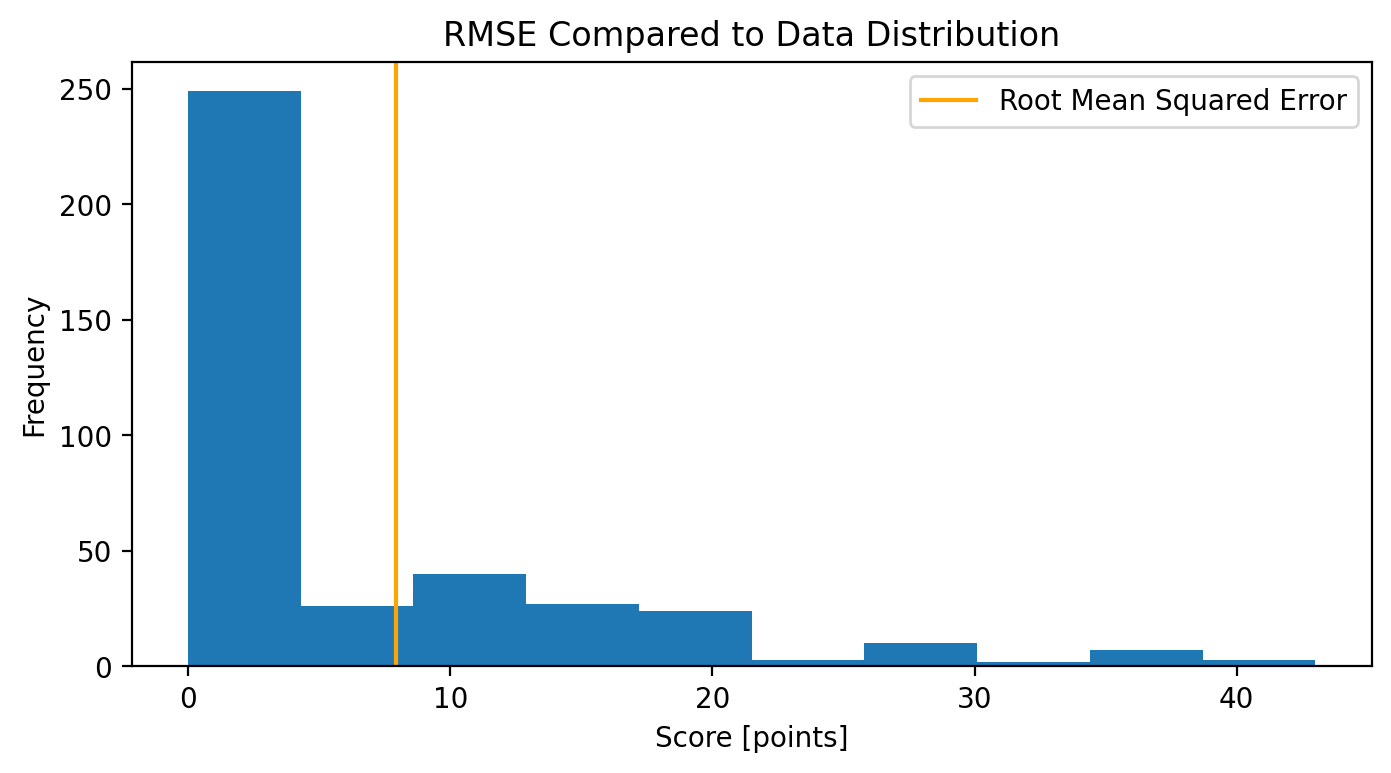

In [63]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (8,4)

plt.hist(y_test)
plt.axvline(rmse, color="orange", label="Root Mean Squared Error")
plt.xlabel("Score [points]")
plt.ylabel("Frequency")
plt.legend()
plt.title("RMSE Compared to Data Distribution")
plt.show()

In [64]:
test_data.sample(30)

,driver,race,race_1,race_2,race_3,race_4,last_year_tot,last_year_avg,last_year_std,same_race_last_year,score,year,Prediction
1497,Pierre Gasly,70A,9.0,0.0,0.0,9.0,112.0,5.333333,5.782156,NaN,0,2020,17.847450
1525,Lance Stroll,SKH,0.0,12.0,0.0,0.0,36.0,1.714286,3.466163,NaN,15,2020,5.935654
1492,Lando Norris,ABU,1.0,15.0,9.0,4.0,73.0,3.476190,3.802881,7.0,13,2020,6.270501
1469,Charles Leclerc,EIF,11.0,7.0,0.0,0.0,377.0,17.952381,11.825719,NaN,9,2020,8.617504
1628,Antonio Giovinazzi,ABU,3.0,0.0,0.0,1.0,26.0,1.238095,2.527939,0.0,0,2020,7.932844
1419,Daniel Ricciardo,POR,18.0,13.0,15.0,11.0,77.0,3.666667,5.782156,NaN,2,2020,13.931414
1591,Nico Hülkenberg,TUR,0.0,0.0,4.0,0.0,51.0,2.428571,4.272838,NaN,0,2020,1.720467
1388,Max Verstappen,BHR,11.0,0.0,18.0,26.0,364.0,17.333333,10.331183,15.0,26,2020,22.572008
1612,Antonio Giovinazzi,AUT,NaN,NaN,NaN,NaN,26.0,1.238095,2.527939,1.0,5,2020,2.802719
1364,Valtteri Bottas,ITA,18.0,20.0,25.0,0.0,402.0,19.142857,10.905438,21.0,13,2020,24.470522


# 2021 Predictions

In [88]:
dataset_2021 = all_data.loc[all_data.year == 2021]

for idx, row in dataset_2021.iterrows():
    driver = row.driver
    race = row.race
    
    driver_subset_2020 = test_data.loc[test_data.driver == driver]
    driver_last_scores = driver_subset_2020.iloc[-4:, -3].values
    if driver_last_scores.shape[0] == 0:
        driver_last_scores = [np.nan for _ in range(4)]
    
    if race == "BHR":
        dataset_2021.loc[idx, ['race_1', 'race_2', 'race_3', 'race_4']] = driver_last_scores[::-1]
    if race == "EMI":
        driver_last_scores = driver_last_scores[1:]
        dataset_2021.loc[idx, ['race_2', 'race_3', 'race_4']] = driver_last_scores[::-1]


X_2021 = dataset_2021.loc[:, [
    "race_1", "race_2", "race_3", "race_4", "last_year_tot", 
    "last_year_avg", "last_year_std", "same_race_last_year"
]]
y_2021 = dataset_2021.loc[:, "score"]

/Users/trent.woodbury/Code/venvs/f1/lib/python3.9/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [89]:
predictions_2021 = model.predict(X_2021)
dataset_2021["predictions"] = predictions_2021

/Users/trent.woodbury/Code/venvs/f1/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
<ipython-input-89-1d191a953f10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2021["predictions"] = predictions_2021


In [92]:
dataset_2021.loc[dataset_2021.race == "EMI"].sort_values("predictions", ascending=False)

,driver,race,race_1,race_2,race_3,race_4,last_year_tot,last_year_avg,last_year_std,same_race_last_year,score,year,predictions
1732,Lewis Hamilton,EMI,28.0,15.0,0.0,38.0,507.0,29.823529,12.284316,33.0,0,2021,26.814083
1778,Valtteri Bottas,EMI,20.0,21.0,17.0,4.0,286.0,16.823529,11.086226,28.0,0,2021,22.492424
1755,Max Verstappen,EMI,31.0,38.0,0.0,26.0,272.0,16.000000,12.041595,0.0,0,2021,15.007081
1893,Carlos Sainz Jr.,EMI,7.0,8.0,15.0,10.0,133.0,7.823529,6.247352,9.0,0,2021,14.276383
1801,Lando Norris,EMI,15.0,13.0,1.0,15.0,132.0,7.764706,6.685146,4.0,0,2021,13.396977
1824,Sergio Pérez,EMI,10.0,0.0,28.0,3.0,155.0,9.117647,7.991264,11.0,0,2021,13.322727
1870,Daniel Ricciardo,EMI,6.0,14.0,10.0,9.0,166.0,9.764706,6.476201,18.0,0,2021,13.111838
2008,Esteban Ocon,EMI,3.0,2.0,21.0,2.0,74.0,4.352941,5.533322,0.0,0,2021,7.459929
1939,Lance Stroll,EMI,4.0,4.0,15.0,0.0,106.0,6.235294,6.638236,0.0,0,2021,5.501353
2031,George Russell,EMI,3.0,0.0,10.0,0.0,10.0,0.588235,2.425356,0.0,0,2021,4.468572
